# Movie Genre Prediction
**Internship Task - CodeClause**

**NAME: GOWRY P P**

This project uses Natural Language Processing (NLP) and Machine Learning techniques to predict the primary genre of a movie based on its plot summary. The model is trained on the IMDb Movie Dataset, using techniques like text cleaning, TF-IDF vectorization, and classification algorithms such as Naive Bayes, Logistic Regression, and Random Forest. Evaluation includes accuracy scoring, classification reports, and confusion matrix visualization to understand model performance across genres.

## Dataset Details

The dataset used for this project is the IMDb Movie Data, which contains metadata for movies including:

- **Title**
- **Genre**
- **Description (plot summary)**
- **Director**
- **Actors**
- **Year**
- **Runtime**
- **Rating**
- **Votes**
- **Revenue**
- **Metascore**

### Relevant Columns Used:
- `Description` → Used as input (X) for predicting the genre.
- `Genre` → Used as the target label (y).

Since many entries in the `Genre` column contain multiple genres (e.g., `Action,Adventure,Sci-Fi`), we simplified the task to single-label classification by taking the first genre only.


## Import Libraries and Load Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IMDb-Movie-Data.csv")

# Display the first few rows
df.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Select Useful Columns

In [8]:
#We'll focus on Description (as plot summary) and Genre (target label).
df = df[['Description', 'Genre']]  # Keep only the needed columns
df.dropna(inplace=True)  # Drop any rows with missing values
df.reset_index(drop=True, inplace=True)


## Preprocessing Steps

To prepare the data for modeling, the following NLP preprocessing steps were applied to the `Description` column:

1. **Lowercasing**: Converted all text to lowercase.
2. **Tokenization**: Split sentences into individual words.
3. **Punctuation Removal**: Removed non-alphabetic characters.
4. **Stopword Removal**: Removed common English words that do not carry significant meaning (like "the", "is", etc.).
5. **Lemmatization**: Reduced words to their base or dictionary form (e.g., "running" → "run").

After cleaning, the processed text was stored in a new column called `clean_plot`.

### Feature Extraction:
Used **TF-IDF (Term Frequency - Inverse Document Frequency)** to convert the cleaned text into numerical vectors for training machine learning models.


## NLP Text Preprocessing (on Description)

In [11]:
#Install and import NLP tools:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
#Define clean-up function:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())  # lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return " ".join(tokens)


In [15]:
#Apply cleaning to plot descriptions:
df['clean_plot'] = df['Description'].apply(clean_text)


## Convert Text to Numbers (TF-IDF Vectorization)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_plot']).toarray()


## Encode the Genres (Target Labels)

In [21]:
# genre column has multiple genres like Action,Adventure,Sci-Fi. 
#For now, we’ll take only the first genre as the label (simplified single-label classification).
# Take the first genre from each string (e.g., "Action,Adventure" → "Action")
df['main_genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['main_genre'])


##  Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## Train the Model (Naive Bayes)

In [29]:
# tell classification_report() which exact labels are in the predictions. 
from sklearn.metrics import accuracy_score, classification_report



In [31]:
# Predict
y_pred = model.predict(X_test)

In [33]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.305


In [35]:
# specify only the labels used in y_test and get their names
import numpy as np
unique_labels = np.unique(y_test)

In [37]:
# Get correct class names for only those labels
target_names = le.inverse_transform(unique_labels)

In [39]:
# generate the report safely
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

      Action       0.29      0.98      0.45        54
   Adventure       0.00      0.00      0.00        16
   Animation       0.00      0.00      0.00        10
   Biography       0.00      0.00      0.00        20
      Comedy       0.50      0.17      0.26        29
       Crime       0.00      0.00      0.00        15
       Drama       0.38      0.07      0.12        43
      Horror       0.00      0.00      0.00         9
     Mystery       0.00      0.00      0.00         2
    Thriller       0.00      0.00      0.00         2

    accuracy                           0.30       200
   macro avg       0.12      0.12      0.08       200
weighted avg       0.23      0.30      0.18       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Other Models (Logistic Regression)

In [42]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)  # increase max_iter to avoid warnings
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [44]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
# Evaluation
log_unique_labels = np.unique(y_test)
log_target_names = le.inverse_transform(log_unique_labels)
print("\nClassification Report:\n", classification_report(y_test, log_pred, labels=log_unique_labels, target_names=log_target_names))

Logistic Regression Accuracy: 0.39

Classification Report:
               precision    recall  f1-score   support

      Action       0.35      0.96      0.51        54
   Adventure       0.00      0.00      0.00        16
   Animation       0.00      0.00      0.00        10
   Biography       0.00      0.00      0.00        20
      Comedy       0.41      0.31      0.35        29
       Crime       0.00      0.00      0.00        15
       Drama       0.57      0.40      0.47        43
      Horror       0.00      0.00      0.00         9
     Mystery       0.00      0.00      0.00         2
    Thriller       0.00      0.00      0.00         2

    accuracy                           0.39       200
   macro avg       0.13      0.17      0.13       200
weighted avg       0.28      0.39      0.29       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Other Models (Random Forest Classifier)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

rf_unique_labels = np.unique(y_test)
rf_target_names = le.inverse_transform(rf_unique_labels)
print("\nClassification Report:\n", classification_report(y_test, rf_pred, labels=rf_unique_labels, target_names=rf_target_names))


Random Forest Accuracy: 0.395

Classification Report:
               precision    recall  f1-score   support

      Action       0.37      0.93      0.53        54
   Adventure       0.00      0.00      0.00        16
   Animation       0.00      0.00      0.00        10
   Biography       0.75      0.15      0.25        20
      Comedy       0.38      0.31      0.34        29
       Crime       0.00      0.00      0.00        15
       Drama       0.49      0.40      0.44        43
      Horror       0.00      0.00      0.00         9
     Mystery       0.00      0.00      0.00         2
    Thriller       0.00      0.00      0.00         2

    accuracy                           0.40       200
   macro avg       0.20      0.18      0.16       200
weighted avg       0.33      0.40      0.31       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix (for visualization)

In [50]:
#The confusion matrix helps you see where your model is getting confused between genres.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Create confusion matrix for logistic regression
cm = confusion_matrix(y_test, log_pred, labels=log_unique_labels)

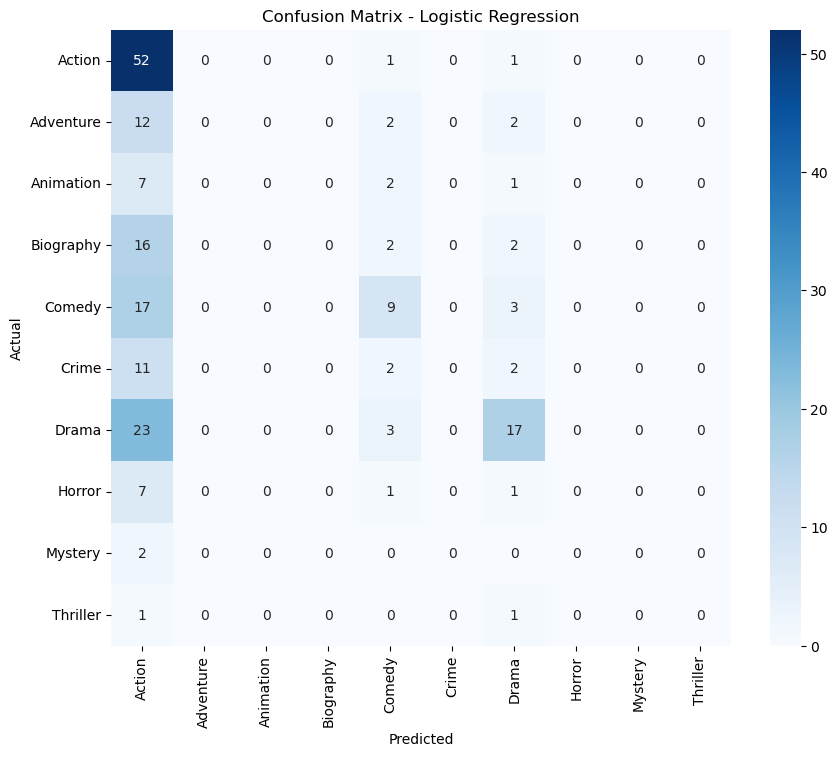

In [54]:
# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_target_names, 
            yticklabels=log_target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Model Building

We experimented with multiple classification models:

### 1. Naive Bayes (MultinomialNB)
- Simple and fast algorithm, especially effective for text data.
- Works well for problems with word frequencies.

### 2. Logistic Regression
- A linear model good for multiclass classification problems.
- More accurate than Naive Bayes in some cases, especially when features are correlated.

### 3. Random Forest
- An ensemble of decision trees.
- Captures nonlinear patterns better, but slower to train.

### Evaluation Metrics Used:
- **Accuracy**
- **Precision, Recall, F1-score** via `classification_report`
- **Confusion Matrix** for visual analysis


## Results

We trained and evaluated three different machine learning models using TF-IDF features from movie plot descriptions.

### Naive Bayes (MultinomialNB)
- **Accuracy**: `~30.5%`
- Strong performance in recognizing the **"Action"** genre (F1-score: 0.45).
- Weak or no predictions for smaller classes like **Animation**, **Horror**, or **Thriller**.
- **Limitation**: Assumes all words are independent (the "naive" assumption), which may not fully capture the complexity of plot descriptions.

### Logistic Regression
- **Accuracy**: `~39%`
- Improved precision and recall for genres like **Action**, **Drama**, and **Comedy**.
- Detected **Action** genre with high recall (96%), but some genres like **Thriller** and **Mystery** were not predicted at all.
- **Balanced Model**: Performs better overall with linear decision boundaries.

### Random Forest Classifier
- **Accuracy**: `~39.5%` (slightly better than Logistic Regression)
- Highest precision for **Biography** (0.75) but low recall for many other classes.
- Like Logistic Regression, failed to detect genres with very few examples.

### Confusion Matrix
Below is the **confusion matrix** for Logistic Regression:

- Most **"Action"** movies were predicted correctly.
- **Drama** and **Comedy** were often confused with Action or each other.
- Genres like **Animation**, **Mystery**, **Horror**, and **Thriller** had poor classification due to fewer examples.


## Conclusion

This project demonstrated how to use Natural Language Processing (NLP) and Machine Learning to predict the **primary genre** of a movie from its plot summary.

### Achievements:
- Applied **text preprocessing** (lowercasing, tokenization, lemmatization, and stopword removal) using NLTK.
- Converted cleaned plots into numerical form using **TF-IDF vectorization**.
- Trained and evaluated three classifiers: **Naive Bayes**, **Logistic Regression**, and **Random Forest**.
- Used **classification reports** and a **confusion matrix** to analyze performance.

### Observations:
- All models performed better with genres that had more training samples (like **Action** and **Drama**).
- **Rare genres** (like Thriller, Animation, Horror) were often missed due to **class imbalance**.
- Logistic Regression and Random Forest outperformed Naive Bayes in accuracy and balance.